In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')

In [3]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [16]:
pandas_profiling.ProfileReport(df_clean)

Number of variables,23
Number of observations,21597
Total Missing (%),0.8%
Total size in memory,3.8 MiB
Average record size in memory,184.0 B
Numeric,19
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [6]:
df_clean = df_raw.copy()

In [7]:
df_clean['sqft_test'] = df_clean['sqft_living'] - df_clean['sqft_above']
df_clean['sqft_basement'] = np.where(df_clean['sqft_basement']=='?', df_clean['sqft_test'], df_clean['sqft_basement'])
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

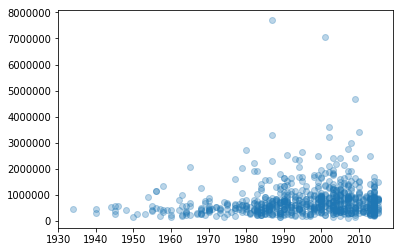

In [8]:
plt.scatter(df_clean[df_clean['yr_renovated']!=0]['yr_renovated'], df_clean[df_clean['yr_renovated']!=0]['price'], alpha=.3)
plt.show()

In [9]:
def renovated_cat(series):
    if series == 0:
        return 'Never Renovated'
    elif 2000 <= series <= 2015:
        return 'Since 2000 inclusive'
    elif  series < 2000:
        return 'Prior to 2000'
    else:
        return 'missing'

df_clean['yr_renovated_cat'] = df_clean['yr_renovated'].apply(renovated_cat)


In [11]:
#Since the mode is 0 and there are only 63 missing values, we recoded the missing values to the mode.
df_clean['view'].fillna(value=0, inplace=True)

In [13]:
df_clean['waterfront'].astype(str)
df_clean['waterfront'].fillna('missing', inplace=True)